In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [3]:
np.unique(data['label'])

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

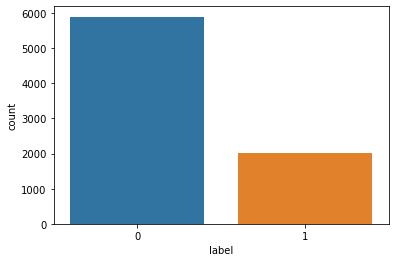

In [4]:
sns.countplot(x="label", data=data)

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [7]:
data.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [8]:
data.shape

(7920, 3)

## Data Preprocessing

In [9]:
# Retaining alphabets and removing everything else

data['tweet'] = data['tweet'].str.replace("[^a-zA-Z]", " ")

In [10]:
data.head()

,id,label,tweet
0,1,0,fingerprint Pregnancy Test https goo gl h ...
1,2,0,Finally a transparant silicon case Thanks t...
2,3,0,We love this Would you go talk makememorie...
3,4,0,I m wired I know I m George I was made that wa...
4,5,1,What amazing service Apple won t even talk to...


In [11]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#tokenization

tokenized_data = data['tweet'].apply(lambda x: x.split())

In [13]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [14]:
# removing stopwords

tokenized_data = tokenized_data.apply(lambda x:[ps.stem(item) for item in x if not item in stop_words])

In [15]:
tokenized_data

0       [fingerprint, pregnanc, test, http, goo, gl, h...
1       [final, transpar, silicon, case, thank, uncl, ...
2       [We, love, would, go, talk, makememori, unplug...
3       [I, wire, I, know, I, georg, I, made, way, iph...
4       [what, amaz, servic, appl, even, talk, questio...
                              ...                        
7915    [live, loud, lol, liveoutloud, selfi, smile, s...
7916    [We, would, like, wish, amaz, day, make, everi...
7917    [help, love, year, old, neighbor, ipad, morn, ...
7918    [final, got, smart, pocket, wifi, stay, connec...
7919    [appl, barcelona, appl, store, bcn, barcelona,...
Name: tweet, Length: 7920, dtype: object

In [16]:
# de-tokenization

detokenized_data = [] 
for i in range(len(data)): 
    t = ' '.join(tokenized_data[i]) 
    detokenized_data.append(t) 

data['tweet'] = detokenized_data

In [17]:
data['tweet']

0       fingerprint pregnanc test http goo gl h mfqv a...
1       final transpar silicon case thank uncl yay son...
2       We love would go talk makememori unplug relax ...
3       I wire I know I georg I made way iphon cute da...
4       what amaz servic appl even talk question I unl...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    We would like wish amaz day make everi minut c...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [18]:
print(detokenized_data)

['fingerprint pregnanc test http goo gl h mfqv android app beauti cute health iger iphoneonli iphonesia iphon', 'final transpar silicon case thank uncl yay soni xperia S sonyexperia http instagram com p yget JC JM', 'We love would go talk makememori unplug relax iphon smartphon wifi connect http fb N lsupcu', 'I wire I know I georg I made way iphon cute daventri home http instagr p Li uj k', 'what amaz servic appl even talk question I unless I pay stupid support', 'iphon softwar updat fuck phone big time stupid iphon', 'happi us instap instadaili us soni xperia xperiaz http instagram com p z qgfwlvj', 'new type C charger cabl UK http www ebay co uk itm bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pic twitter com pjiwq wtc', 'bout go shop listen music iphon justm music likeforlik followforfollow http instagr p Vj bg tlql', 'photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor h

In [19]:
#BOW

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X = cv.fit_transform(detokenized_data).toarray()
y=data['label'].values

In [20]:
len(X[0])

20283

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## LOGISTIC REGRESSION MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_model1 = model1.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1152
           1       0.79      0.80      0.80       432

    accuracy                           0.89      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.89      0.89      0.89      1584



Text(33.0, 0.5, 'actual')

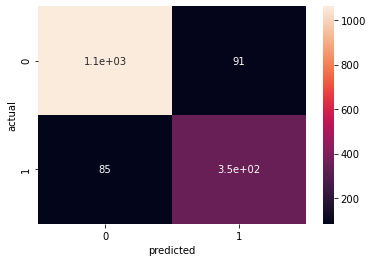

In [26]:
cm = confusion_matrix(y_test, y_model1)
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

## Naive Bayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [28]:
y_model2 = model2.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_model2))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1152
           1       0.63      0.71      0.67       432

    accuracy                           0.81      1584
   macro avg       0.76      0.78      0.77      1584
weighted avg       0.82      0.81      0.81      1584



Text(33.0, 0.5, 'actual')

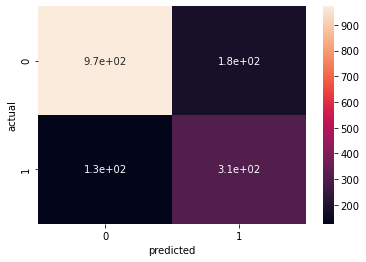

In [30]:
cm = confusion_matrix(y_test, y_model2)
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')